In [1]:
%matplotlib inline
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'
from modsim import *

In [2]:
def make_system(*, gammatau=1.36*0.2, mu=1.36*0.001, beta=0.00027, rho=0.1, alpha=3.6*0.01, delta=0.33, sigma=2, pi=100, end=120):
    init_state = State(R=200, L=0, E=0, V=0.0000004)
    t0 = 0
    return System(init=init_state, t0=t0, t_end=120, dt=0.1,
                  params={'gammatau':gammatau,
                          'mu':mu,
                          'beta':beta,
                          'rho':rho,
                          'alpha':alpha,
                          'delta':delta,
                          'sigma':sigma,
                          'pi': pi
                         }
                 )

In [3]:
sys = make_system()

,values
init,R 2.000000e+02 L 0.000000e+00 E 0.000...
t0,0
t_end,120
dt,0.1
params,"{'gammatau': 0.272, 'mu': 0.00136, 'beta': 0.0..."


In [4]:
def update_func(state: State, t: float, system: System) -> State:

    dRdt = system.params['gammatau'] + -system.params['mu']*state.R + -system.params['beta']*state.R*state.V
    #print(system.params['gammatau'],system.params['mu']*state.R,system.params['beta']*state.R*state.V)
    dR = dRdt*system.dt
   # print(dR)
    
    dLdt = system.params['rho']*system.params['beta']*state.R*state.V + -system.params['mu']*state.L + -system.params['alpha']*state.L
    dL = system.dt*dLdt
    
    dEdt = (1-system.params['rho'])*system.params['beta']*state.R*state.V + system.params['alpha']*state.L + -system.params['delta']*state.E
    dE = dEdt*system.dt
    
    dVdt = system.params['pi']*state.E + -system.params['sigma']*state.V
    dV = system.dt*dVdt
    
    state.R += dR
    state.L += dL
    state.E += dE
    state.V += dV
    
    newState = State(R=state.R, L=state.L, E=state.E, V=state.V)
    return newState

In [5]:
def run_sim(system, update_func):
    frame = TimeFrame(columns=system.init.index)
    frame.row[system.t0] = system.init
    for index in linrange(0, 1200, 1):
        frame.row[index+1] = update_func(frame.row[index], index, system)
    return frame

In [6]:
sys = make_system()
result = run_sim(sys, update_func);
#plot(result.R, '-', label='r')
#plot(result.L, '-', label='l')
#plot(result.E, '-', label='e')
#plot(result.V, '-', label='v')
#decorate(xlabel='Time (idk)',
         #ylabel='AAAAAA')
print(result)

               R             L             E             V
0     200.000000  0.000000e+00  0.000000e+00  4.000000e-07
1     200.000000  2.160000e-10  1.944000e-09  3.200000e-07
2     200.000000  3.879930e-10  3.435826e-09  2.754400e-07
3     200.000000  5.352811e-10  4.662479e-09  2.547103e-07
4     200.000000  6.708248e-10  5.748436e-09  2.503930e-07
5     200.000000  8.035308e-10  6.778062e-09  2.577987e-07
6     200.000000  9.397402e-10  7.810181e-09  2.740196e-07
7     200.000000  1.084200e-09  8.887563e-09  2.973175e-07
8     200.000000  1.240701e-09  1.004314e-08  3.267296e-07
9     200.000000  1.412500e-09  1.130409e-08  3.618151e-07
10    200.000000  1.602603e-09  1.269456e-08  4.024930e-07
11    200.000000  1.813961e-09  1.423752e-08  4.489400e-07
12    200.000000  2.049612e-09  1.595607e-08  5.015272e-07
13    200.000000  2.312779e-09  1.787432e-08  5.607824e-07
14    200.000000  2.606961e-09  2.001819e-08  6.273691e-07
15    200.000000  2.936001e-09  2.241599e-08  7.020772e-

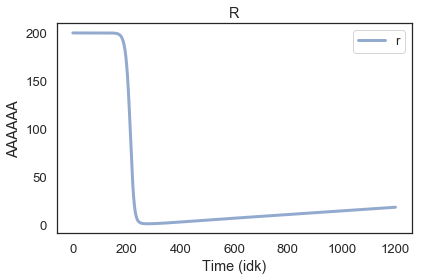

In [7]:
plot(result.R, '-', label='r')
decorate(xlabel='Time (idk)',
         ylabel='AAAAAA',
        title='R')


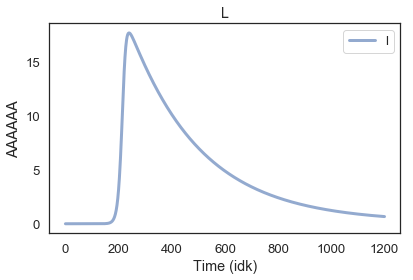

In [8]:
plot(result.L, '-', label='l')
decorate(xlabel='Time (idk)',
         ylabel='AAAAAA',
        title='L')


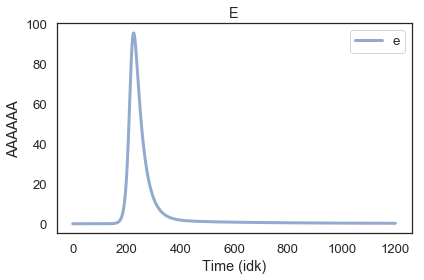

In [9]:
plot(result.E, '-', label='e')
decorate(xlabel='Time (idk)',
         ylabel='AAAAAA',
        title='E')


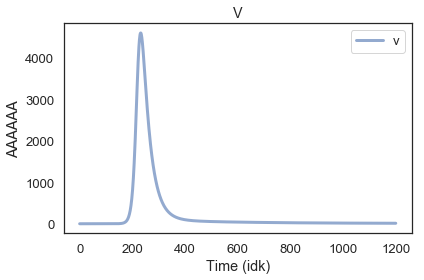

In [10]:
plot(result.V, '-', label='v')
decorate(xlabel='Time (idk)',
         ylabel='AAAAAA',
        title='V')

In [11]:
 index_array=linrange(0, 1200, 1)

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 1.197e+03, 1.198e+03,
       1.199e+03])

In [12]:
len(index_array)

1200